# Gráfica de barras de tendencia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Crear datos simulados para varios estados
estados = ['Jalisco', 'CDMX', 'Nuevo León']
fechas = pd.date_range(start='2010-01-01', end='2025-01-01', freq='MS')
data = []

np.random.seed(42)
for estado in estados:
    for fecha in fechas:
        con_datos = np.random.randint(10, 100)
        sin_datos = np.random.randint(0, 20)
        data.append({
            'estado': estado,
            'fecha': fecha,
            'indicador': 'Con datos',
            'valor': con_datos
        })
        data.append({
            'estado': estado,
            'fecha': fecha,
            'indicador': 'Sin datos',
            'valor': sin_datos
        })

df = pd.DataFrame(data)

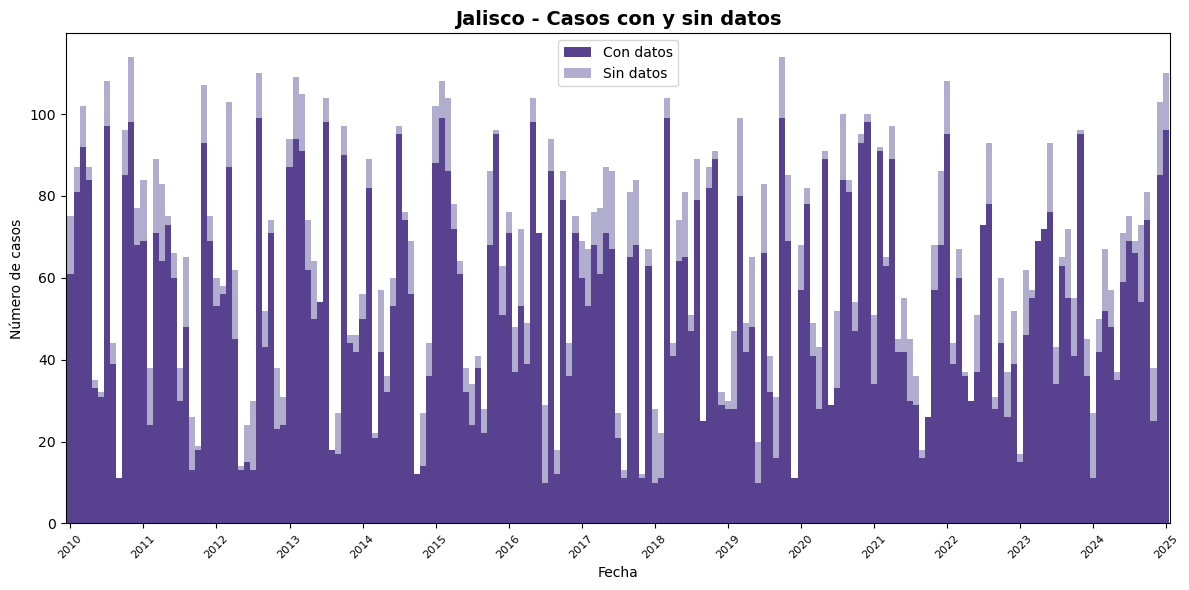

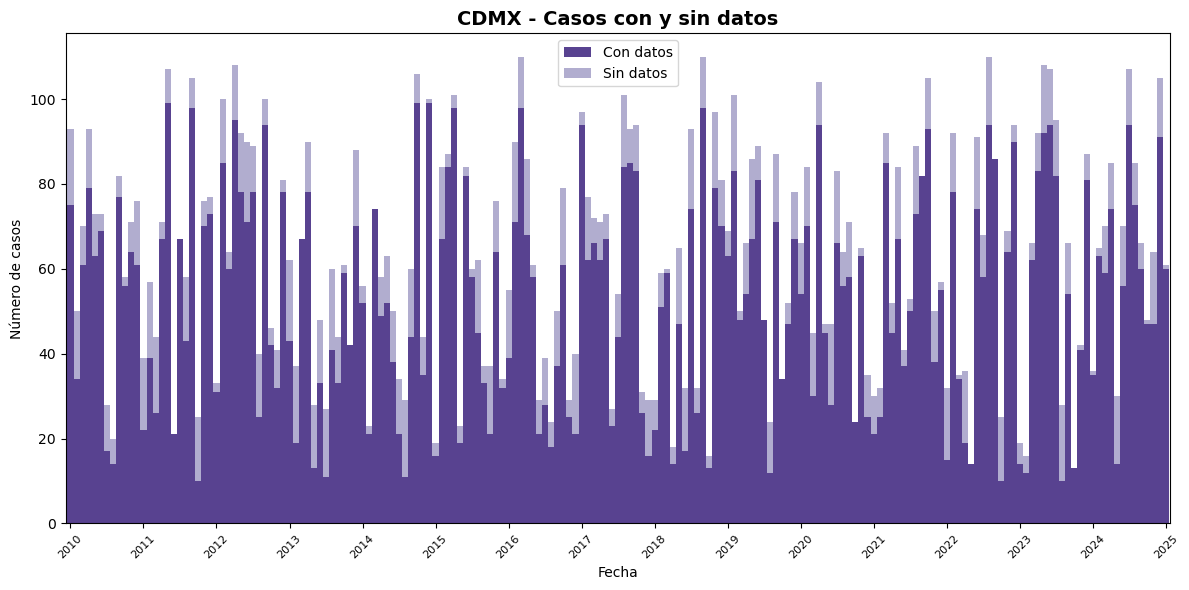

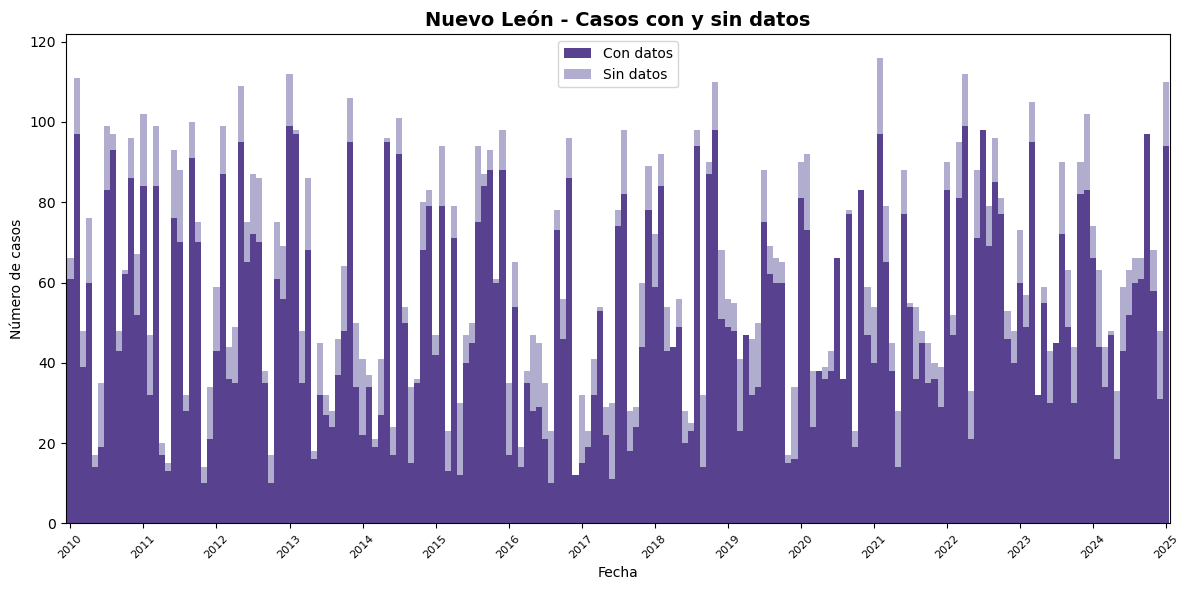

In [7]:
# Crear una gráfica por estado y guardar cada una
output_dir = os.path.expanduser("~/Desktop/plantillas/python/grafica_barras_tendencias")
os.makedirs(output_dir, exist_ok=True)

# Crear una gráfica por estado
for estado in estados:
    fig, ax = plt.subplots(figsize=(12, 6))
    df_estado = df[df['estado'] == estado]
    pivot_df = df_estado.pivot(index='fecha', columns='indicador', values='valor').fillna(0)
    pivot_df[['Con datos', 'Sin datos']].plot(kind='bar', stacked=True, color=["#584290", "#b1adcf"], ax=ax, width=1)

    ax.set_title(f'{estado} - Casos con y sin datos', fontsize=14, fontweight='bold')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Número de casos')
    ax.set_xticks(range(0, len(pivot_df), 12))
    ax.set_xticklabels([date.strftime('%Y') for date in pivot_df.index[::12]], rotation=45, fontsize=8)
    ax.legend(title='')
    ax.grid(False)
    plt.tight_layout()
    plt.show()

    file_base = os.path.join(output_dir, f"{estado.replace(' ', '_')}_grafica_barras_tendencias")
    fig.savefig(f"{file_base}.png", format="png", bbox_inches='tight', dpi=300)
    fig.savefig(f"{file_base}.svg", format="svg", bbox_inches='tight', dpi=300)
    plt.close(fig)